# Assignment 2


In [ ]:
# Y is lateral dimension, positive Y to the right of table
# Z if forward-backward, farther away from the camera getws more negative, closer is less negative but always negative 
# X is depth, but X plane is on an angle, so moving towrds the camera can make the ired look like it is going below the camera


#10 trials at (0,0,0) (approximately)
#1 trial at each corner 
#1 trial at height at (0,0,0)
#collected 1000 data points 

#attached ireds to either end of a ruler 
#oriented in y-dimension (horizontal, facing camera)
#oriented in x-dimension (vertical, facing camera)
#oriented in z-dimension (depth, facing upwards, measuring away from the camera)

#distribution, mean, std for all axes for four corners, at height (15 total)
#distribution, mean of means, and SEM for all axes for center stationary (3 total)
#distribution, mean, std for relevant axis for measurement trials (3 total)


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import math as math
import scipy as sp
from scipy.signal import find_peaks

In [3]:
file_path = "LG.xlsx"

In [4]:
#center_df = pd.read_excel(file_path, sheet_name = ['Sheet1', 'Sheet2','Sheet3','Sheet4','Sheet5','Sheet6','Sheet7','Sheet8','Sheet9','Sheet10'], header = None)

In [5]:
top_right_df = pd.read_excel(file_path, sheet_name = 'Sheet13', header = None)
bottom_right_df = pd.read_excel(file_path, sheet_name = 'Sheet14', header = None)
bottom_left_df = pd.read_excel(file_path, sheet_name = 'Sheet12', header = None)
top_left_df = pd.read_excel(file_path, sheet_name = 'Sheet11', header = None)

at_height_df = pd.read_excel(file_path, sheet_name = 'Sheet15', header = None)

difference_y_df = pd.read_excel(file_path, sheet_name = 'Sheet16', header = None)
difference_z_df = pd.read_excel(file_path, sheet_name = 'Sheet17', header = None)
difference_x_df = pd.read_excel(file_path, sheet_name = 'Sheet18', header = None)

mean_of_means_X = pd.read_excel(file_path, sheet_name = 'Sheet19', header = None)
mean_of_means_y = pd.read_excel(file_path, sheet_name = 'Sheet22', header = None)
mean_of_means_z = pd.read_excel(file_path, sheet_name = 'Sheet23', header = None)

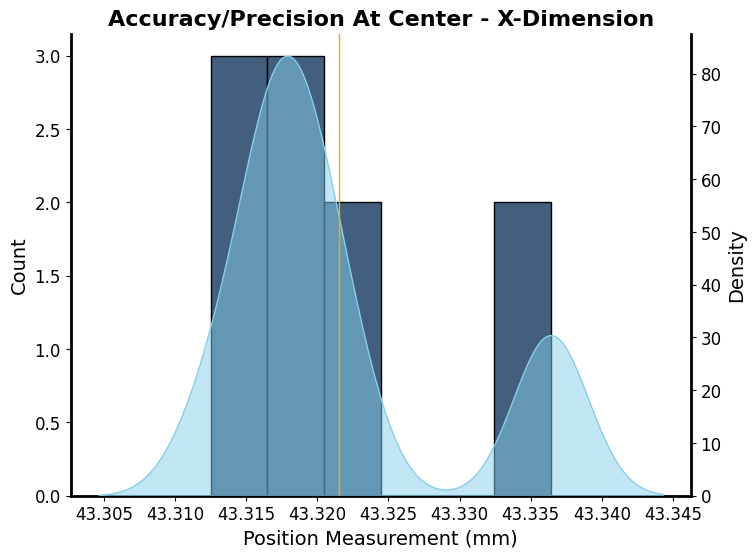

In [6]:
#dist_means = {43.3364, 43.3364, 43.3222, 43.3205, 43.3188, 43.3181, 43.3175, 43.3165, 43.3157, 43.3125]

snr_center_x = 43.3215/0.00262
cv_center_x = (0.00262/43.3215)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = mean_of_means_X, x = 0, ax = ax1, color = '#022B52', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Center - X-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = mean_of_means_X, x = 0, fill = True, color = 'skyblue', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.axvline(x = 43.3215, color = 'orange', linewidth = 1, label = 'Mean (-0.56702)')
#ax2.axvline(x = -0.56663, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-0.56663)')
ax2.axvline(x = 43.3215, color = 'purple', linewidth = 1, alpha = 0, label = 'SEM (0.00262)')
plt.savefig('Cent_X_svg')


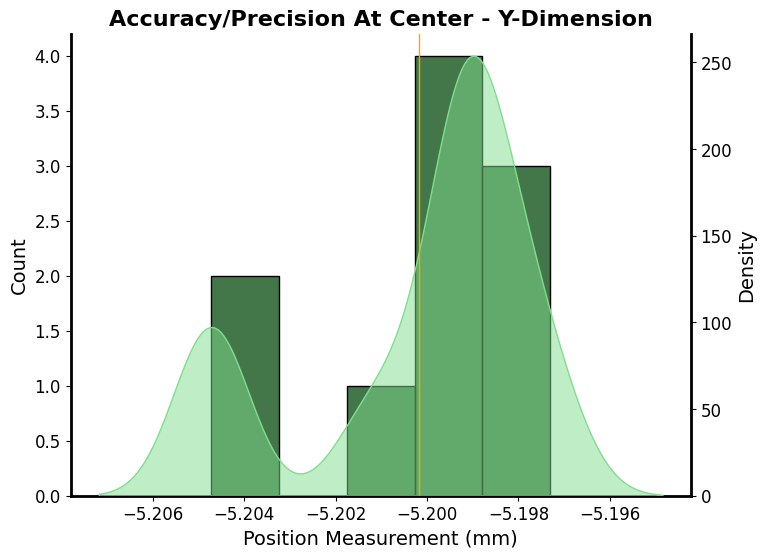

In [7]:
snr_center_y = -5.20017/0.000822
cv_center_y = (0.000822/-5.20017)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = mean_of_means_y, x = 0, ax = ax1, color = '#044A0D', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Center - Y-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = mean_of_means_y, x = 0, fill = True, color = '#81DE8E', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
#ax2.set_xticks([297.83, 297.84, 297.85, 297.86, 297.87, 297.88, 297.89])
#ax2.set_xticklabels(['297.83', '297.84', '297.85', '297.86', '297.87', '297.88', '297.89'])
ax2.axvline(x = -5.20017, color = 'orange', linewidth = 1, label = 'Mean (-5.20017)')
#ax2.axvline(x = 297.857, color = 'red', linewidth = 1, alpha = 0, label = 'Median (297.857)')
ax2.axvline(x = -5.20017, color = 'purple', linewidth = 1, alpha = 0, label = 'SEM (0.000822)')
plt.savefig('Cent_Y_svg')

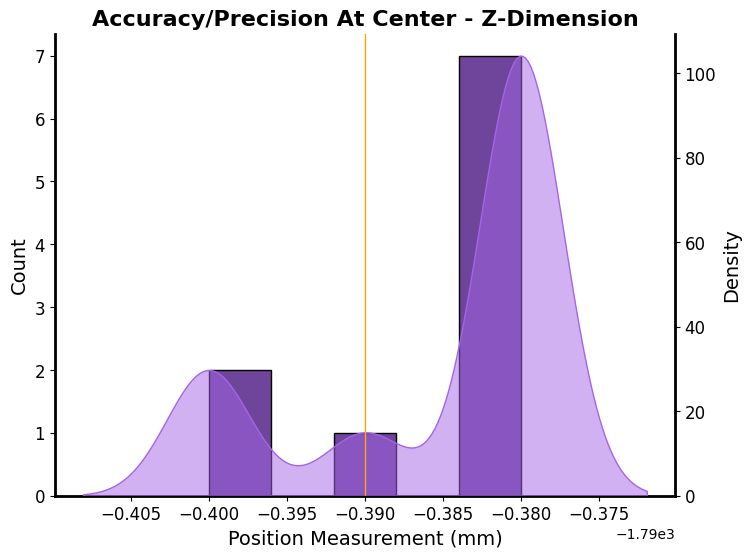

In [8]:
snr_center_z = -1790.39/0.002688
cv_center_z = (0.002688/-1790.39)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = mean_of_means_z, x = 0, ax = ax1, color = '#3F067A', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Center - Z-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = mean_of_means_z, x = 0, fill = True, color = '#A465E6', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
#ax2.set_xticks([-1568.42, -1568.43, -1568.44, -1568.45, -1568.46, -1568.47, -1568.48])
#ax2.set_xticklabels(['-1568.42', '-1568.43', '-1568.44', '-1568.45', '-1568.46', '-1568.47', '-1568.48'])
ax2.axvline(x = -1790.39, color = 'orange', linewidth = 1, label = 'Mean (-1790.39)')
#ax2.axvline(x = -1568.45, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-1568.45)')
ax2.axvline(x = -1790.39, color = 'purple', linewidth = 1, alpha = 0, label = 'SEM (0.002688)')
plt.savefig('Cent_Z_svg')

C:\Users\gauth\AppData\Local\Temp\ipykernel_7820\2742239021.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=center_full_df, x="dataset", y="value_norm",


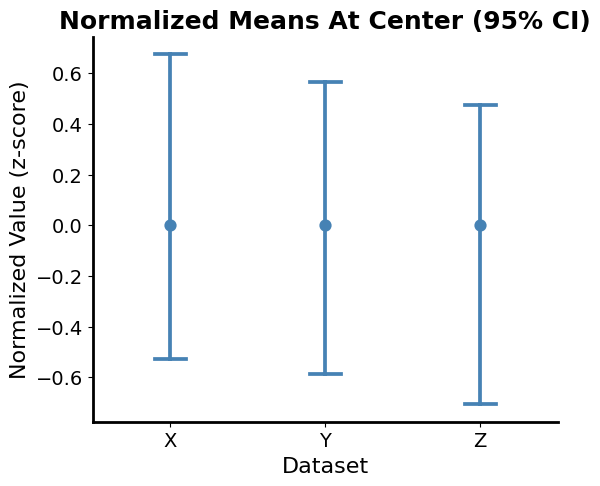

In [ ]:
# Center - normalized

center_full_df = pd.concat([
    pd.DataFrame({"value": mean_of_means_X[0], "dataset": "X"}),
    pd.DataFrame({"value": mean_of_means_y[0], "dataset": "Y"}),
    pd.DataFrame({"value": mean_of_means_z[0], "dataset": "Z"})
])

center_full_df["value_norm"] = center_full_df.groupby("dataset")["value"].transform(
    lambda x: (x - x.mean()) / x.std()
)

fig, ax = plt.subplots(figsize=(6, 5))
sns.pointplot(data=center_full_df, x="dataset", y="value_norm",
              errorbar="ci", join=False, capsize=0.2,
              color="steelblue")

plt.title("Normalized Means At Center (95% CI)", fontsize=18, fontweight="bold")
plt.ylabel("Normalized Value (z-score)", fontsize=16)
plt.xlabel("Dataset", fontsize=16)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig('Cent_norm_svg')

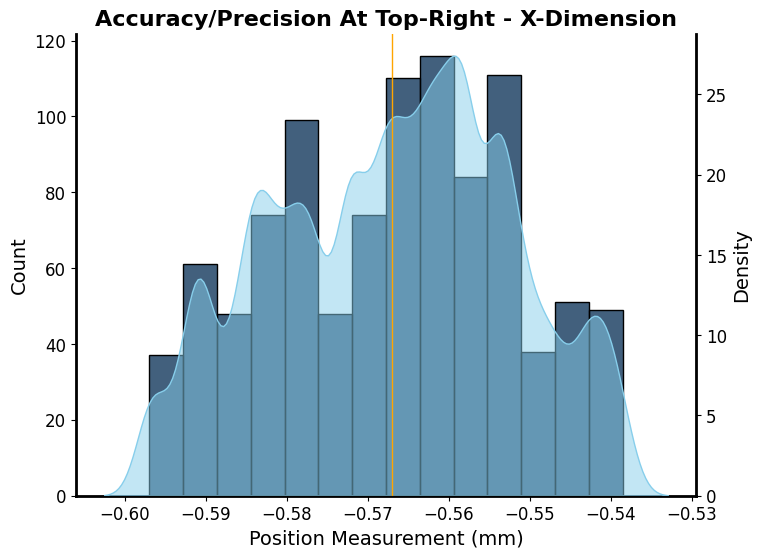

In [10]:
snr_tr_x = -0.56702/0.01476
cv_tr_x = (0.01476/-0.56702)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = top_right_df, x = 0, ax = ax1, color = '#022B52', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Top-Right - X-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = top_right_df, x = 0, fill = True, color = 'skyblue', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.axvline(x = -0.56702, color = 'orange', linewidth = 1, label = 'Mean (-0.56702)')
ax2.axvline(x = -0.56663, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-0.56663)')
ax2.axvline(x = -0.56663, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.01476)')
plt.savefig('Topright_X_svg')

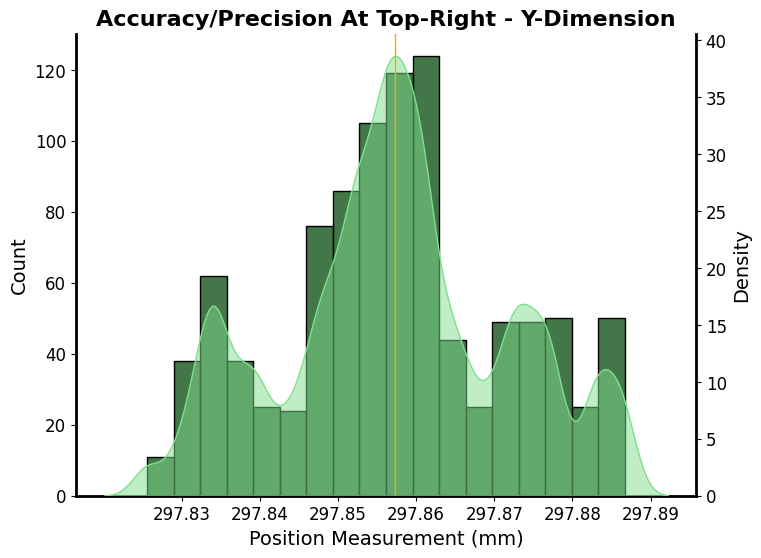

In [11]:
snr_tr_y = 297.8573/0.01457
cv_tr_y = (0.01457/297.8573)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = top_right_df, x = 1, ax = ax1, color = '#044A0D', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Top-Right - Y-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = top_right_df, x = 1, fill = True, color = '#81DE8E', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.set_xticks([297.83, 297.84, 297.85, 297.86, 297.87, 297.88, 297.89])
ax2.set_xticklabels(['297.83', '297.84', '297.85', '297.86', '297.87', '297.88', '297.89'])
ax2.axvline(x = 297.8573, color = 'orange', linewidth = 1, label = 'Mean (297.8573)')
ax2.axvline(x = 297.857, color = 'red', linewidth = 1, alpha = 0, label = 'Median (297.857)')
ax2.axvline(x = 297.857, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.01457)')
plt.savefig('Topright_Y_svg')

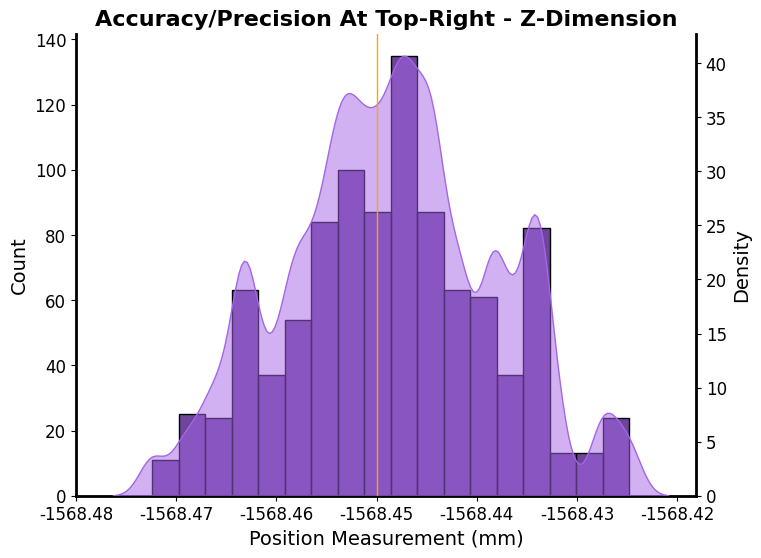

In [12]:
snr_tr_z = -1568.45/0.0104
cv_tr_z = (0.0104/-1568.45)/100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = top_right_df, x = 2, ax = ax1, color = '#3F067A', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Top-Right - Z-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = top_right_df, x = 2, fill = True, color = '#A465E6', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.set_xticks([-1568.42, -1568.43, -1568.44, -1568.45, -1568.46, -1568.47, -1568.48])
ax2.set_xticklabels(['-1568.42', '-1568.43', '-1568.44', '-1568.45', '-1568.46', '-1568.47', '-1568.48'])
ax2.axvline(x = -1568.45, color = 'orange', linewidth = 1, label = 'Mean (-1568.45)')
ax2.axvline(x = -1568.45, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-1568.45)')
ax2.axvline(x = -1568.45, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.0104)')
plt.savefig('Topright_Z_svg')

C:\Users\gauth\AppData\Local\Temp\ipykernel_7820\3773652739.py:15: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=top_right_full_df, x="dataset", y="value_norm",


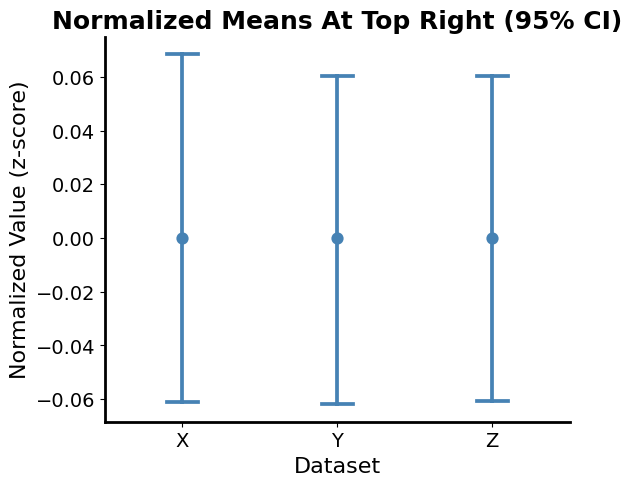

In [ ]:

top_right_full_df = pd.concat([
    pd.DataFrame({"value": top_right_df[0], "dataset": "X"}),
    pd.DataFrame({"value": top_right_df[1], "dataset": "Y"}),
    pd.DataFrame({"value": top_right_df[2], "dataset": "Z"})
])


top_right_full_df["value_norm"] = top_right_full_df.groupby("dataset")["value"].transform(
    lambda x: (x - x.mean()) / x.std()
)

fig, ax = plt.subplots(figsize=(6, 5))
sns.pointplot(data=top_right_full_df, x="dataset", y="value_norm",
              errorbar="ci", join=False, capsize=0.2,
              color="steelblue")

plt.title("Normalized Means At Top Right (95% CI)", fontsize=18, fontweight="bold")
plt.ylabel("Normalized Value (z-score)", fontsize=16)
plt.xlabel("Dataset", fontsize=16)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig('Topright_norm_svg')

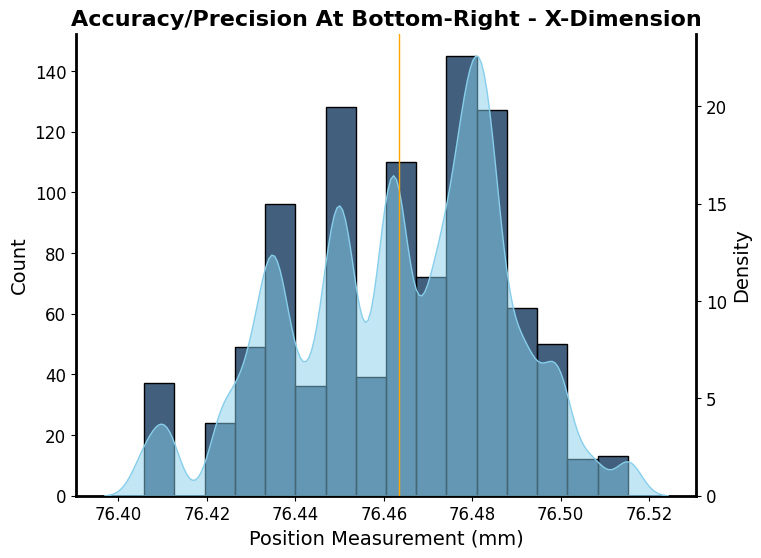

In [15]:
snr_br_x = 76.46341/0.023994
cv_br_x = (0.023994/76.46341)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = bottom_right_df, x = 0, ax = ax1, color = '#022B52', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Bottom-Right - X-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = bottom_right_df, x = 0, fill = True, color = 'skyblue', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.axvline(x = 76.46341, color = 'orange', linewidth = 1, label = 'Mean (76.46341)')
ax2.axvline(x = 76.46377, color = 'red', linewidth = 1, alpha = 0, label = 'Median (76.46377)')
ax2.axvline(x = 76.46377, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.023994)')
plt.savefig('Bottomright_X_svg')

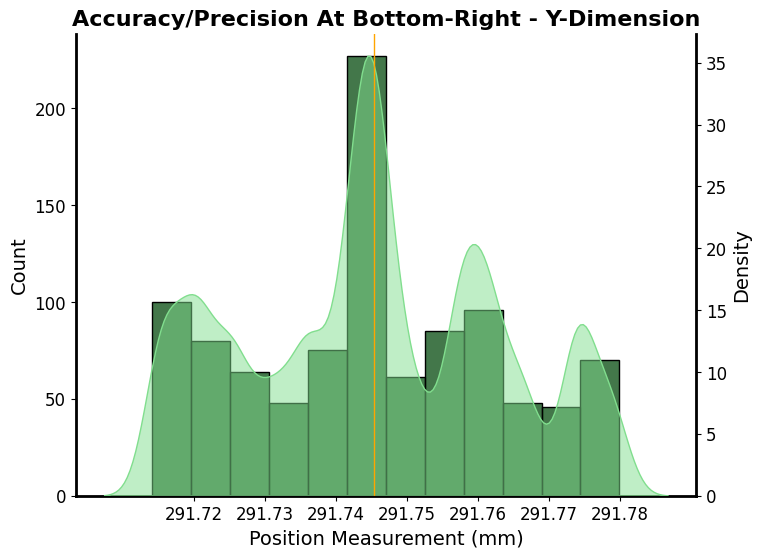

In [16]:
snr_br_y = 291.7475/0.018039
cv_br_y = (0.018039/291.7475)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = bottom_right_df, x = 1, ax = ax1, color = '#044A0D', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Bottom-Right - Y-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = bottom_right_df, x = 1, fill = True, color = '#81DE8E', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.set_xticks([291.72, 291.73, 291.74, 291.75, 291.76, 291.77, 291.78])
ax2.set_xticklabels(['291.72', '291.73', '291.74', '291.75', '291.76', '291.77', '291.78'])
ax2.axvline(x = 291.7454, color = 'orange', linewidth = 1, label = 'Mean (291.7454)')
ax2.axvline(x = 291.745, color = 'red', linewidth = 1, alpha = 0, label = 'Median (291.745)')
ax2.axvline(x = 291.745, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.018039)')
plt.savefig('Bottomright_Y_svg')

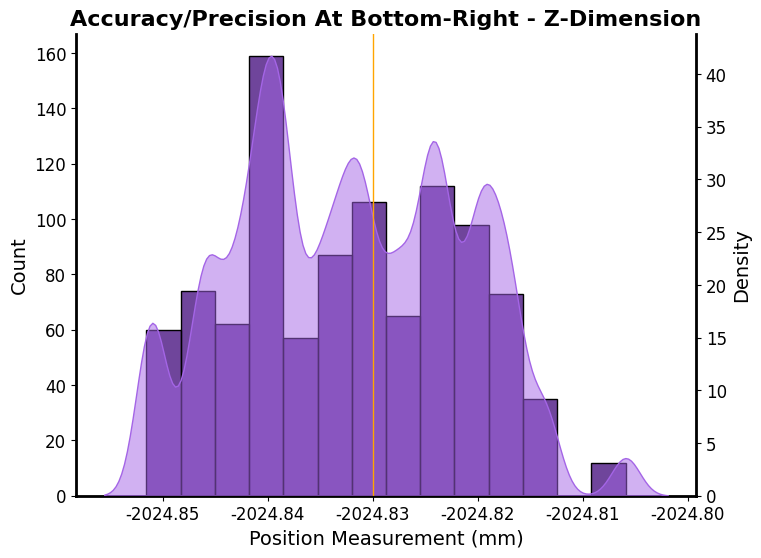

In [17]:
snr_br_z = -2024.83/-0.010668
cv_br_z = (-0.010668/-2024.83)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = bottom_right_df, x = 2, ax = ax1, color = '#3F067A', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Bottom-Right - Z-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = bottom_right_df, x = 2, fill = True, color = '#A465E6', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.set_xticks([-2024.80, -2024.81, -2024.82, -2024.83, -2024.84, -2024.85])
ax2.set_xticklabels(['-2024.80', '-2024.81', '-2024.82', '-2024.83', '-2024.84', '-2024.85'])
ax2.axvline(x = -2024.83, color = 'orange', linewidth = 1, label = 'Mean (-2024.83)')
ax2.axvline(x = -2024.83, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-2024.83)')
ax2.axvline(x = -2024.83, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(-0.010668)')
plt.savefig('Bottomright_Z_svg')

C:\Users\gauth\AppData\Local\Temp\ipykernel_7820\4028718764.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=bottom_right_full_df, x="dataset", y="value_norm",


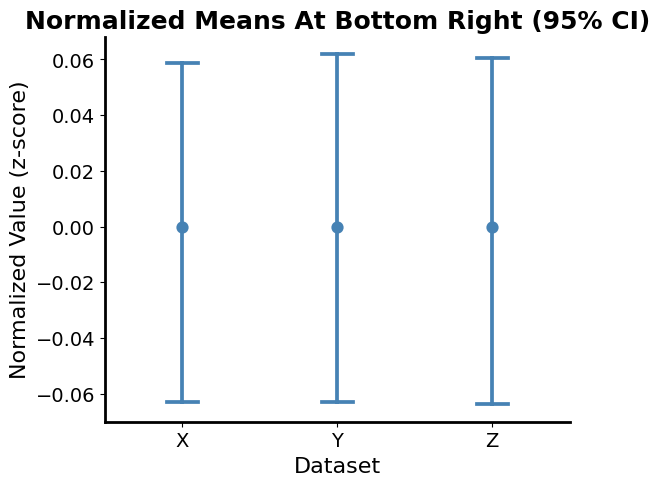

In [ ]:
#Bottom right = normalized


bottom_right_full_df = pd.concat([
    pd.DataFrame({"value": bottom_right_df[0], "dataset": "X"}),
    pd.DataFrame({"value": bottom_right_df[1], "dataset": "Y"}),
    pd.DataFrame({"value": bottom_right_df[2], "dataset": "Z"})
])


bottom_right_full_df["value_norm"] = bottom_right_full_df.groupby("dataset")["value"].transform(
    lambda x: (x - x.mean()) / x.std()
)


fig, ax = plt.subplots(figsize=(6, 5))
sns.pointplot(data=bottom_right_full_df, x="dataset", y="value_norm",
              errorbar="ci", join=False, capsize=0.2,
              color="steelblue")

plt.title("Normalized Means At Bottom Right (95% CI)", fontsize=18, fontweight="bold")
plt.ylabel("Normalized Value (z-score)", fontsize=16)
plt.xlabel("Dataset", fontsize=16)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig('Bottomright_norm_svg')

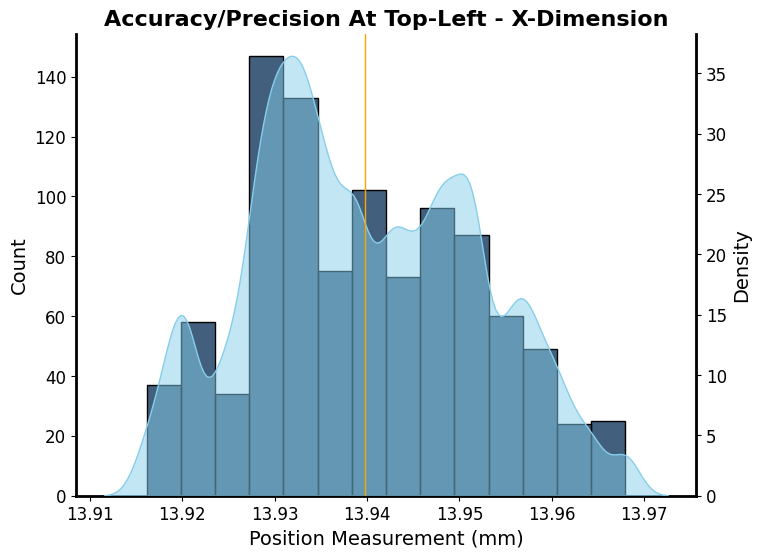

In [19]:
snr_tl_x = 13.9398/0.0122
cv_tl_x = (0.0122/13.9398)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = top_left_df, x = 0, ax = ax1, color = '#022B52', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Top-Left - X-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = top_left_df, x = 0, fill = True, color = 'skyblue', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.axvline(x = 13.9398, color = 'orange', linewidth = 1, label = 'Mean (13.9398)')
ax2.axvline(x = 13.9386, color = 'red', linewidth = 1, alpha = 0, label = 'Median (13.9386)')
ax2.axvline(x = 13.9386, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.0122)')
plt.savefig('Topleft_X_svg')

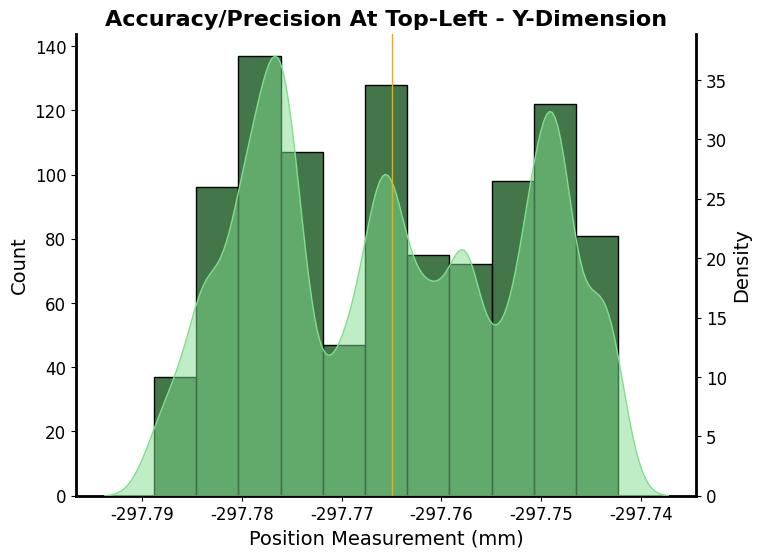

In [20]:
snr_tl_y = -297.765/0.01323
cv_tl_y = (0.01323/-297.765)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = top_left_df, x = 1, ax = ax1, color = '#044A0D', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Top-Left - Y-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = top_left_df, x = 1, fill = True, color = '#81DE8E', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.set_xticks([-297.74, -297.75, -297.76, -297.77, -297.78, -297.79])
ax2.set_xticklabels(['-297.74', '-297.75', '-297.76', '-297.77', '-297.78', '-297.79'])
ax2.axvline(x = -297.765, color = 'orange', linewidth = 1, label = 'Mean (-297.765)')
ax2.axvline(x = -297.765, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-297.765)')
ax2.axvline(x = -297.765, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.01323)')
plt.savefig('Topleft_Y_svg')

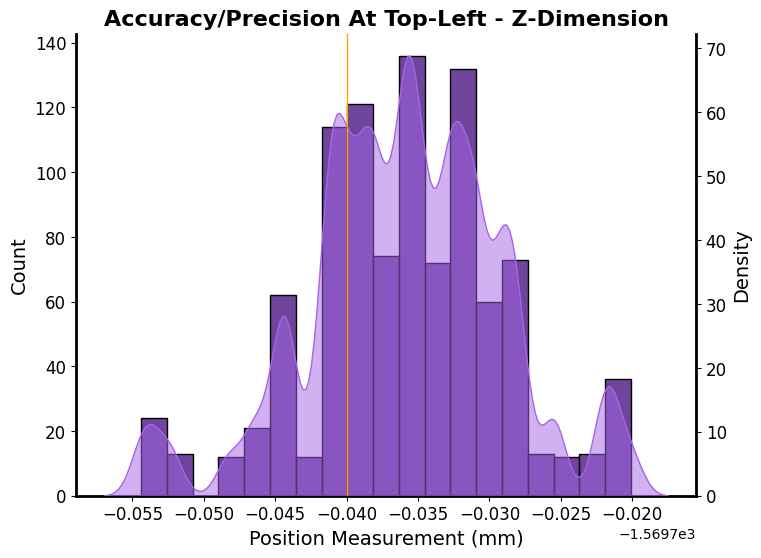

In [21]:
snr_tl_z = -1569.74/0.00686
cv_tl_z = (0.00686/-1569.74)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = top_left_df, x = 2, ax = ax1, color = '#3F067A', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Top-Left - Z-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = top_left_df, x = 2, fill = True, color = '#A465E6', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
#ax2.set_xticks([-1569.72, -1569.25, -1569.3, -1567.35, -1567.4, -1569.45, -1569.5, -1569.55])
#ax2.set_xticklabels(['-1569.72', '-1569.25', '-1569.3', '-1567.35', '-1567.4', '-1569.45', '-1569.5', '-1569.55'])
ax2.axvline(x = -1569.74, color = 'orange', linewidth = 1, label = 'Mean (-1569.74)')
ax2.axvline(x = -1569.74, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-1569.74)')
ax2.axvline(x = -1569.74, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.00686)')
plt.savefig('Topleft_Z_svg')

C:\Users\gauth\AppData\Local\Temp\ipykernel_7820\448248154.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=top_left_full_df, x="dataset", y="value_norm",


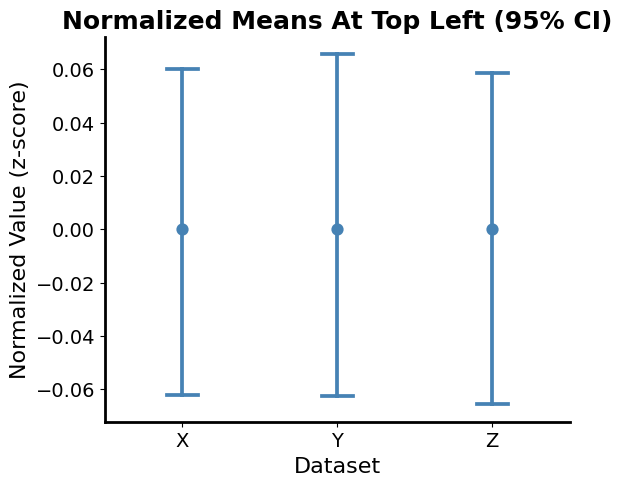

In [ ]:
#Top left - normalized


top_left_full_df = pd.concat([
    pd.DataFrame({"value": top_left_df[0], "dataset": "X"}),
    pd.DataFrame({"value": top_left_df[1], "dataset": "Y"}),
    pd.DataFrame({"value": top_left_df[2], "dataset": "Z"})
])


top_left_full_df["value_norm"] = top_left_full_df.groupby("dataset")["value"].transform(
    lambda x: (x - x.mean()) / x.std()
)


fig, ax = plt.subplots(figsize=(6, 5))
sns.pointplot(data=top_left_full_df, x="dataset", y="value_norm",
              errorbar="ci", join=False, capsize=0.2,
              color="steelblue")

plt.title("Normalized Means At Top Left (95% CI)", fontsize=18, fontweight="bold")
plt.ylabel("Normalized Value (z-score)", fontsize=16)
plt.xlabel("Dataset", fontsize=16)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig('Topleft_norm_svg')

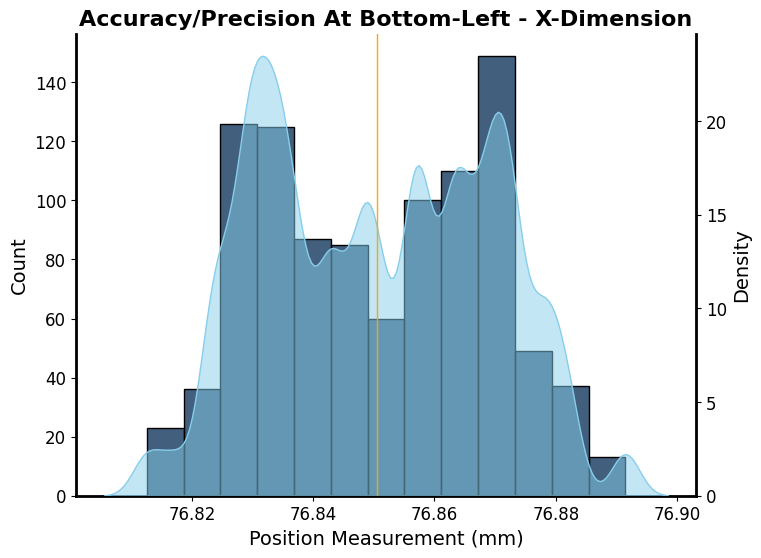

In [23]:
snr_bl_x = 76.8506/0.01859
cv_bl_x = (0.01859/76.8506)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = bottom_left_df, x = 0, ax = ax1, color = '#022B52', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Bottom-Left - X-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = bottom_left_df, x = 0, fill = True, color = 'skyblue', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.axvline(x = 76.8506, color = 'orange', linewidth = 1, label = 'Mean (76.8506)')
ax2.axvline(x = 76.8503, color = 'red', linewidth = 1, alpha = 0, label = 'Median (76.8503)')
ax2.axvline(x = 76.8503, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.01859)')
plt.savefig('Bottomleft_X_svg')

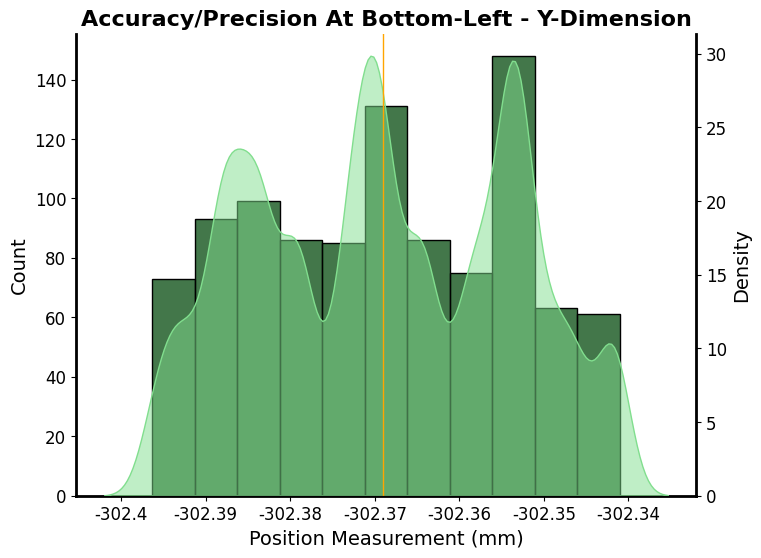

In [24]:
snr_bl_y = -302.369/0.0151
cv_bl_y = (0.0151/-302.369)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = bottom_left_df, x = 1, ax = ax1, color = '#044A0D', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Bottom-Left - Y-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = bottom_left_df, x = 1, fill = True, color = '#81DE8E', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.set_xticks([-302.34, -302.35, -302.36, -302.37, -302.38, -302.39, -302.4])
ax2.set_xticklabels(['-302.34', '-302.35', '-302.36', '-302.37', '-302.38', '-302.39', '-302.4'])
ax2.axvline(x = -302.369, color = 'orange', linewidth = 1, label = 'Mean (-362.369)')
ax2.axvline(x = -302.37, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-302.37)')
ax2.axvline(x = -302.37, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.0151)')
plt.savefig('Bottomleft_Y_svg')

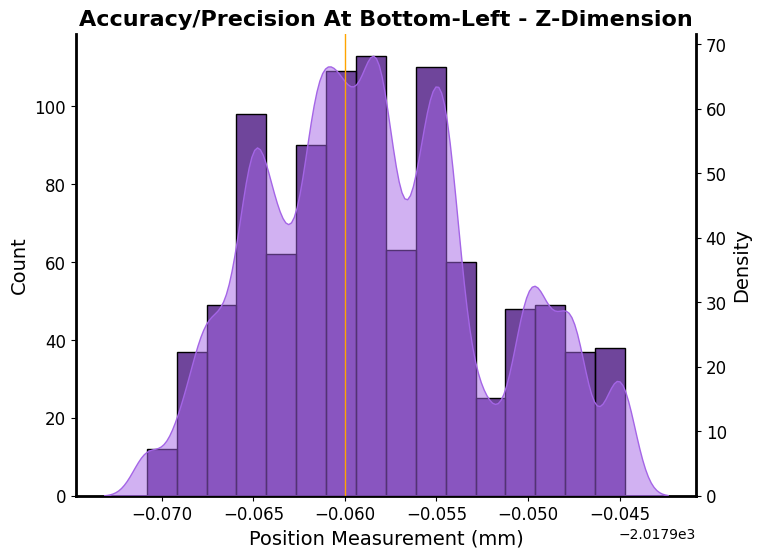

In [25]:
snr_bl_z = -2017.96/0.00619
cv_bl_z = (0.00619/-2017.96)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = bottom_left_df, x = 2, ax = ax1, color = '#3F067A', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Bottom-Left - Z-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = bottom_left_df, x = 2, fill = True, color = '#A465E6', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
#ax2.set_xticks([-2017.94, -2017.945, 
#ax2.set_xticklabels(['-2024.80', '-2024.81', '-2024.82', '-2024.83', '-2024.84', '-2024.85'])
ax2.axvline(x = -2017.96, color = 'orange', linewidth = 1, label = 'Mean (-2017.96)')
ax2.axvline(x = -2017.96, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-2017.96)')
ax2.axvline(x = -2017.96, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.00619)')
plt.savefig('Bottomleft_Z_svg')

C:\Users\gauth\AppData\Local\Temp\ipykernel_7820\2429519526.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=bottom_left_full_df, x="dataset", y="value_norm",


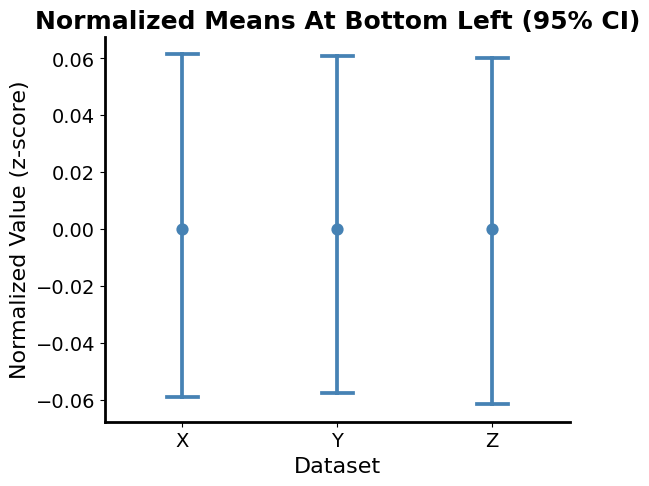

In [ ]:
#Bottom left - normalized 


bottom_left_full_df = pd.concat([
    pd.DataFrame({"value": bottom_left_df[0], "dataset": "X"}),
    pd.DataFrame({"value": bottom_left_df[1], "dataset": "Y"}),
    pd.DataFrame({"value": bottom_left_df[2], "dataset": "Z"})
])


bottom_left_full_df["value_norm"] = bottom_left_full_df.groupby("dataset")["value"].transform(
    lambda x: (x - x.mean()) / x.std()
)


fig, ax = plt.subplots(figsize=(6, 5))
sns.pointplot(data=bottom_left_full_df, x="dataset", y="value_norm",
              errorbar="ci", join=False, capsize=0.2,
              color="steelblue")

plt.title("Normalized Means At Bottom Left (95% CI)", fontsize=18, fontweight="bold")
plt.ylabel("Normalized Value (z-score)", fontsize=16)
plt.xlabel("Dataset", fontsize=16)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig('Bottomleft_norm_svg')

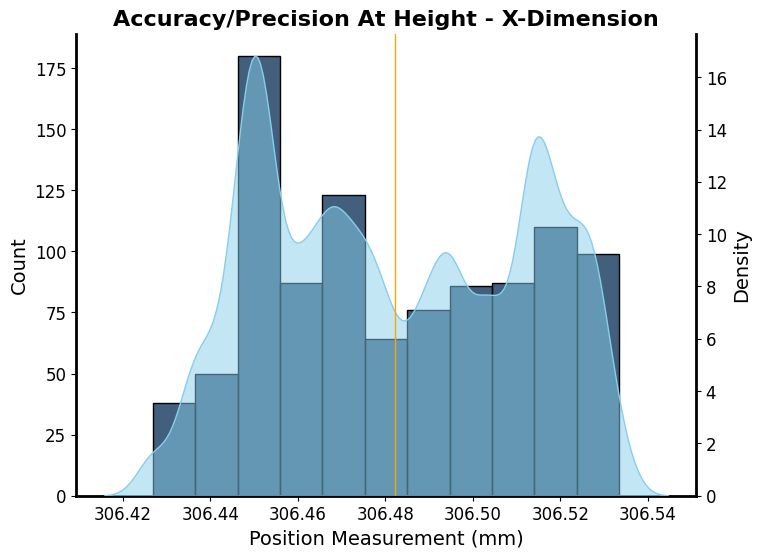

In [27]:
snr_height_x = 306.4822/0.029489
cv_height_x = (0.029489/306.4822)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = at_height_df, x = 0, ax = ax1, color = '#022B52', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Height - X-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = at_height_df, x = 0, fill = True, color = 'skyblue', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.axvline(x = 306.4822, color = 'orange', linewidth = 1, label = 'Mean (306.4822)')
ax2.axvline(x = 306.479, color = 'red', linewidth = 1, alpha = 0, label = 'Median (306.479)')
ax2.axvline(x = 306.479, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.029489)')
plt.savefig('Height_X_svg')

#plt.setp(ax.get_xticklabels(), fontweight = 'bold')
#ax1.setp(ax.get_yticklabels(), fontweight = 'bold')

# palette1 = sns.color_palette('ch:s=.25,rot=-.25', as_cmap = True)
#sns.kdeplot(data = at_height_df, x = 0, ax = ax[)
#sns.stripplot(data = at_height_df, y = 0, color = 'gray', jitter = 0.2, alpha = 0.7)
#sns.boxplot(data = at_height_df, y = 0, width = 0.1, color = 'black', boxprops={'facecolor': 'none', 'edgecolor' : 'black'}, whiskerprops={'color' : 'black'}, medianprops = {'color':'red'}, showfliers = False)

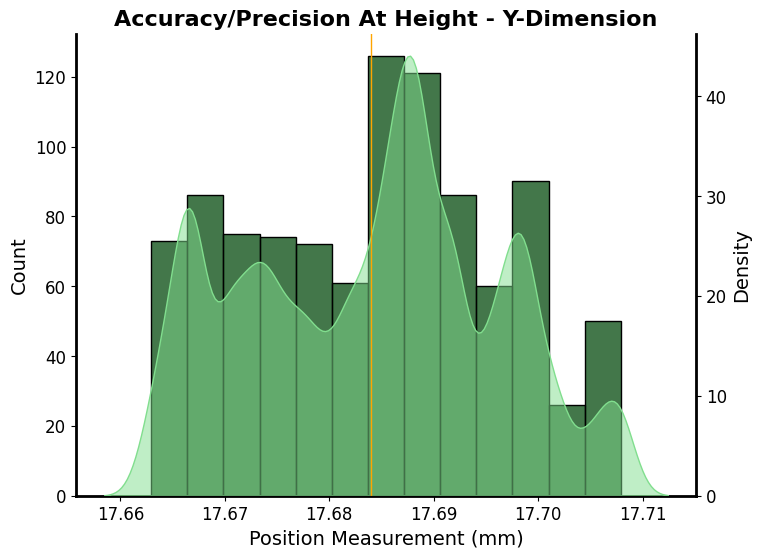

In [28]:
snr_height_y = 17.68401/0.011935
cv_height_y = (0.011936/17.68566)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = at_height_df, x = 1, ax = ax1, color = '#044A0D', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Height - Y-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = at_height_df, x = 1, fill = True, color = '#81DE8E', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.axvline(x = 17.68401, color = 'orange', linewidth = 1, label = 'Mean (17.68401)')
ax2.axvline(x = 17.68566, color = 'red', linewidth = 1, alpha = 0, label = 'Median (17.68566)')
ax2.axvline(x = 17.68566, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.011935)')
plt.savefig('Height_Y_svg')

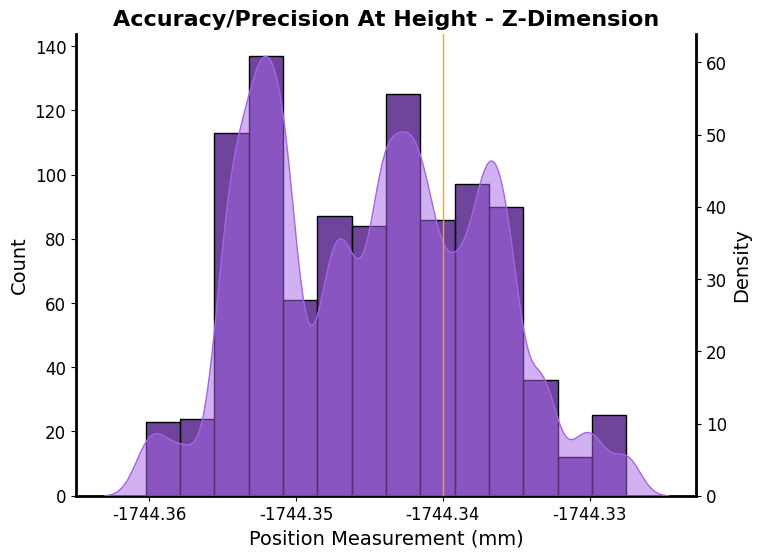

In [29]:
snr_height_z = -1744.34/0.007478
cv_height_z = (0.007478/-1744.34)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = at_height_df, x = 2, ax = ax1, color = '#3F067A', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision At Height - Z-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = at_height_df, x = 2, fill = True, color = '#A465E6', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.set_xticks([-1744.33, -1744.34, -1744.35, -1744.36])
ax2.set_xticklabels(['-1744.33', '-1744.34', '-1744.35', '-1744.36'])
ax2.axvline(x = -1744.34, color = 'orange', linewidth = 1, label = 'Mean (-1744.34)')
ax2.axvline(x = -1744.34, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-1744.34)')
ax2.axvline(x = -1744.34, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.007478)')
plt.savefig('Height_Z_svg')

C:\Users\gauth\AppData\Local\Temp\ipykernel_7820\3643856649.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=at_height_full_df, x="dataset", y="value_norm",


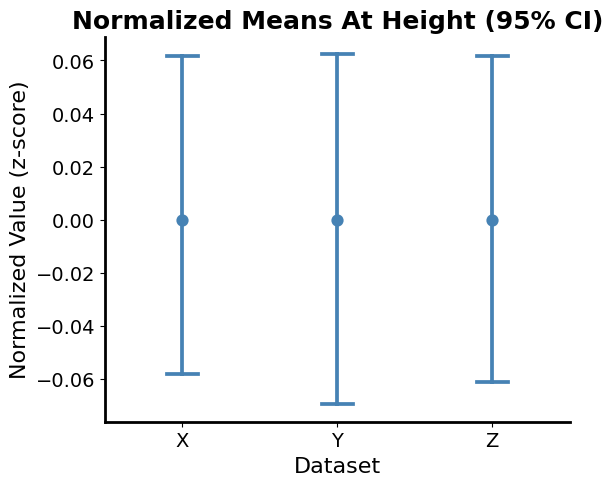

In [ ]:
# At height - normalized


at_height_full_df = pd.concat([
    pd.DataFrame({"value": at_height_df[0], "dataset": "X"}),
    pd.DataFrame({"value": at_height_df[1], "dataset": "Y"}),
    pd.DataFrame({"value": at_height_df[2], "dataset": "Z"})
])


at_height_full_df["value_norm"] = at_height_full_df.groupby("dataset")["value"].transform(
    lambda x: (x - x.mean()) / x.std()
)


fig, ax = plt.subplots(figsize=(6, 5))
sns.pointplot(data=at_height_full_df, x="dataset", y="value_norm",
              errorbar="ci", join=False, capsize=0.2,
              color="steelblue")

plt.title("Normalized Means At Height (95% CI)", fontsize=18, fontweight="bold")
plt.ylabel("Normalized Value (z-score)", fontsize=16)
plt.xlabel("Dataset", fontsize=16)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig('Height_norm_svg')

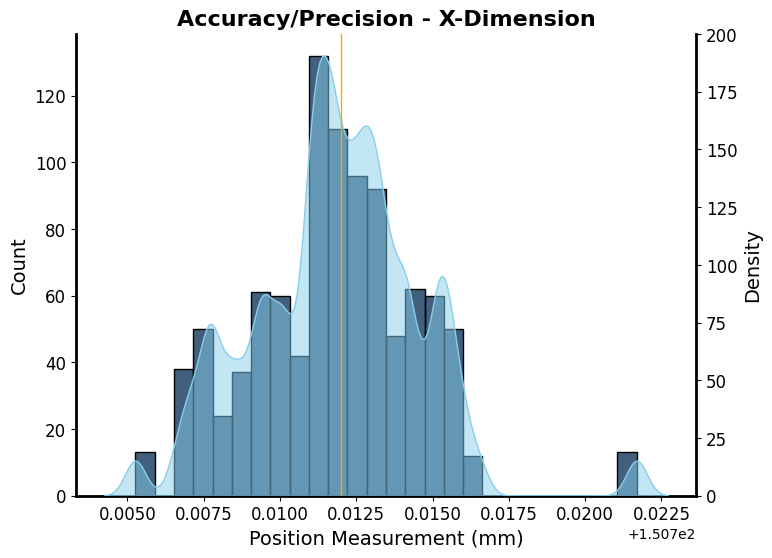

In [31]:
snr_ruler_x = 150.712/0.00271
cv_ruler_x = (0.00271/150.712)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = difference_x_df, x = 6, ax = ax1, color = '#022B52', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision - X-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = difference_x_df, x = 6, fill = True, color = 'skyblue', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.axvline(x = 150.712, color = 'orange', linewidth = 1, label = 'Mean (151.3172)')
#ax2.axvline(x = 306.479, color = 'red', linewidth = 1, alpha = 0, label = 'Median (306.479)')
ax2.axvline(x = 150.712, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.00271)')
plt.savefig('Ruler_X_svg')

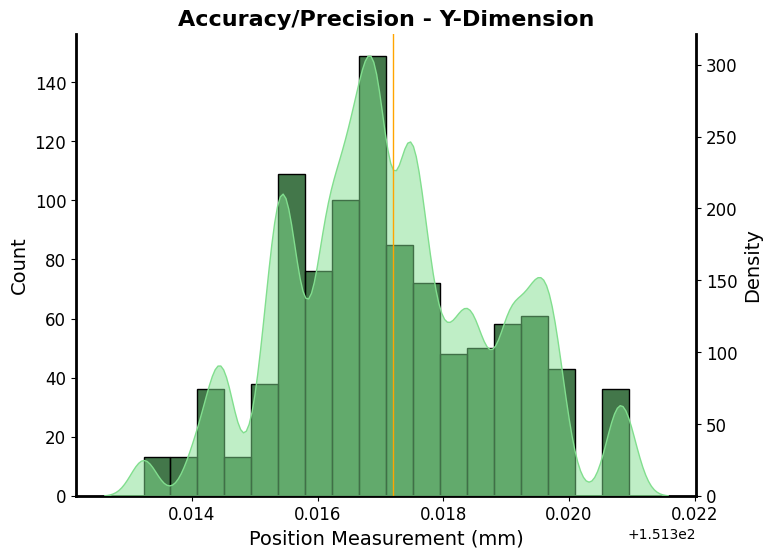

In [32]:
snr_ruler_y = 151.3172/0.00166
cv_ruler_y = (0.00166/151.3172)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = difference_y_df, x = 7, ax = ax1, color = '#044A0D', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision - Y-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = difference_y_df, x = 7, fill = True, color = '#81DE8E', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax2.axvline(x = 151.3172, color = 'orange', linewidth = 1, label = 'Mean (151.3172)')
#ax2.axvline(x = 17.68566, color = 'red', linewidth = 1, alpha = 0, label = 'Median (17.68566)')
ax2.axvline(x = 151.3172, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.00166)')
plt.savefig('Ruler_Y_svg')

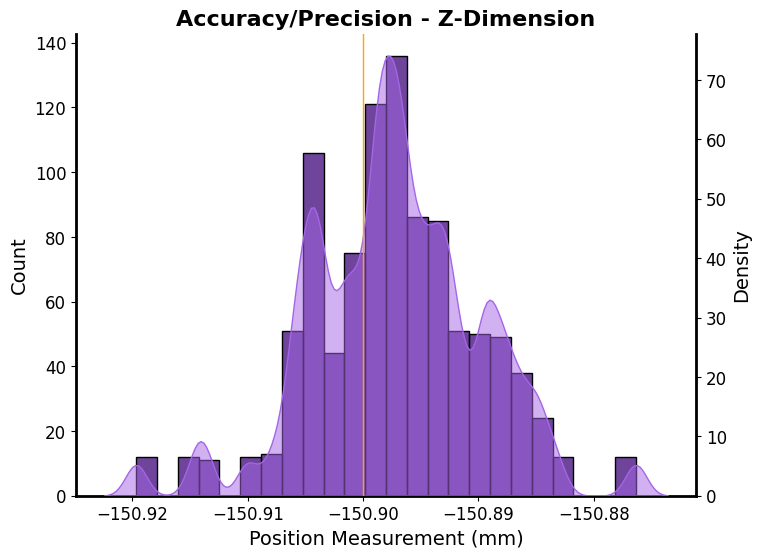

In [33]:
snr_ruler_z = -150.9/0.00735
cv_ruler_z = (0.00735/-150.9)*100

fig, ax1 = plt.subplots(figsize=(8,6))
sns.histplot(data = difference_z_df, x = 8, ax = ax1, color = '#3F067A', alpha = 0.75) 
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.set_xlabel('Position Measurement (mm)', size = 14)
ax1.set_ylabel('Count', size = 14)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_title('Accuracy/Precision - Z-Dimension', fontweight = 'bold', size = 16)
ax2 = ax1.twinx()
sns.kdeplot(data = difference_z_df, x = 8, fill = True, color = '#A465E6', alpha = 0.5, bw_adjust = 0.5, ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Density', size = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
#ax2.set_xticks([-1744.33, -1744.34, -1744.35, -1744.36])
#ax2.set_xticklabels(['-1744.33', '-1744.34', '-1744.35', '-1744.36'])
ax2.axvline(x = -150.9, color = 'orange', linewidth = 1, label = 'Mean (-150.9)')
#ax2.axvline(x = -1744.34, color = 'red', linewidth = 1, alpha = 0, label = 'Median (-1744.34)')
ax2.axvline(x = -150.9, color = 'purple', linewidth = 1, alpha = 0, label = 'St.Dev.(0.00735)')
plt.savefig('Ruler_Z_svg')

C:\Users\gauth\AppData\Local\Temp\ipykernel_7820\3377613870.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data= differences_full_df, x="dataset", y="value_norm",


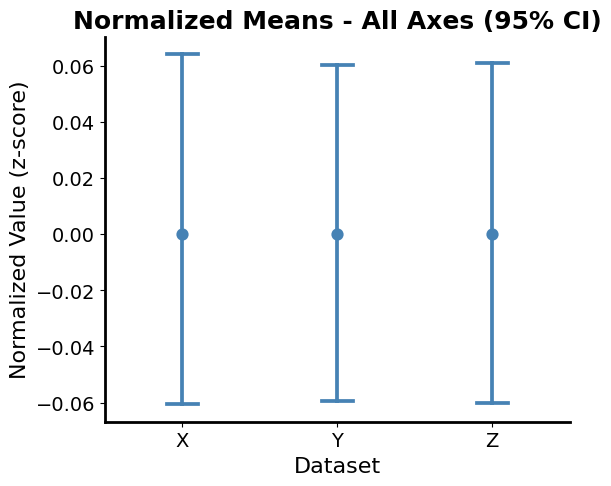

In [ ]:
# Ruler diffs - normalized


differences_full_df = pd.concat([
    pd.DataFrame({"value": difference_x_df[6], "dataset": "X"}),
    pd.DataFrame({"value": difference_y_df[7], "dataset": "Y"}),
    pd.DataFrame({"value": difference_z_df[8], "dataset": "Z"})
])

differences_full_df["value_norm"] = differences_full_df.groupby("dataset")["value"].transform(
    lambda x: (x - x.mean()) / x.std()
)


fig, ax = plt.subplots(figsize=(6, 5))
sns.pointplot(data= differences_full_df, x="dataset", y="value_norm",
              errorbar="ci", join=False, capsize=0.2,
              color="steelblue")

plt.title("Normalized Means - All Axes (95% CI)", fontsize=18, fontweight="bold")
plt.ylabel("Normalized Value (z-score)", fontsize=16)
plt.xlabel("Dataset", fontsize=16)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig('Rulers_norm_svg')

## Part 1

In [112]:
x1 = np.linspace(0,5,5000)
y = np.cos(2*np.pi*1*x1 + 1)

noise_large = (np.random.normal(0,1,5000)-0.5)*15
noise_small = (np.random.normal(0,1,5000)-0.5)*0.5

noise_signal_large = y + noise_large
noise_signal_small = y + noise_small


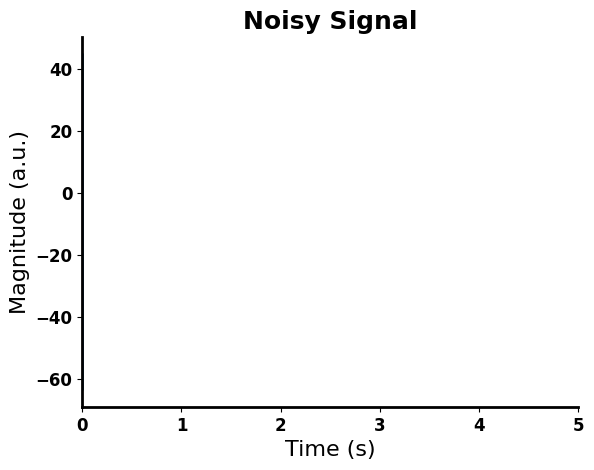

In [122]:
fig, ax = plt.subplots()
ax.plot(x1, noise_signal_large)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel('Time (s)', size = 16)
plt.setp(ax.get_xticklabels(), fontweight = 'bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.setp(ax.get_yticklabels(), fontweight = 'bold')
ax.set_ylabel( 'Magnitude (a.u.)', size = 16)
ax.set_title('Noisy Signal', fontweight= 'bold', size = 18)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
plt.savefig('Noisy_Signal_og_svg')
#ax1 = sns.scatterplot(x = [0.765], y = [-60.53830306713647], color = 'r') ## plot min value
#ax3 = sns.scatterplot(x = [3.490], y = [-57.58781273568894], color = 'r') ## plot min window value
#ax2 = sns.scatterplot(x = [4.930], y = [66.9412680937784], color = 'k')   ## plot max value
#ax4 = sns.scatterplot(x = [1.750], y = [40.77187394640827], color = 'k')  ## plot max window value
#plt.savefig('snr_large_svg')

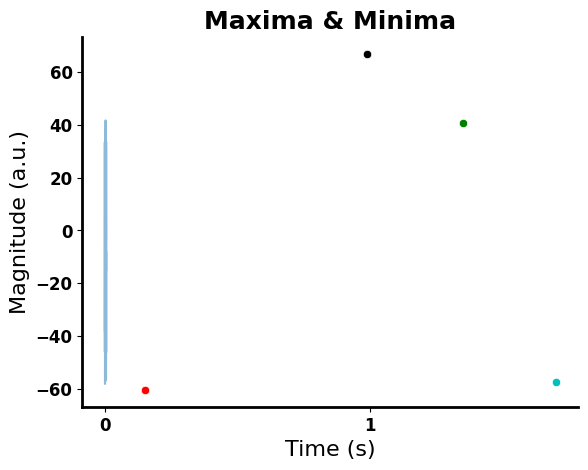

In [38]:
fig, ax = plt.subplots()
ax.plot(x1, noise_signal_large, alpha = 0.5)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel('Time (s)', size = 16)
plt.setp(ax.get_xticklabels(), fontweight = 'bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.setp(ax.get_yticklabels(), fontweight = 'bold')
ax.set_ylabel( 'Magnitude (a.u.)', size = 16)
ax.set_title('Maxima & Minima', fontweight= 'bold', size = 18)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
ax1 = sns.scatterplot(x = [153], y = [-60.53830306713647], color = 'r') ## plot min value
ax3 = sns.scatterplot(x = [1698], y = [-57.58781273568894], color = 'c') ## plot min window value
ax2 = sns.scatterplot(x = [986], y = [66.9412680937784], color = 'k')   ## plot max value
ax4 = sns.scatterplot(x = [1350], y = [40.77187394640827], color = 'g')  ## plot max window value
plt.savefig('Maxmins_svg')

In [65]:
#P1A

python_mean = np.mean(noise_signal_large)
python_std = np.std(noise_signal_large)
python_rms = np.sqrt(np.mean(noise_signal_large**2))
python_mean

np.float64(-7.650278375614426)

In [40]:
def calc_mean(signal):
    sum = 0
    for i in signal:
        sum = sum + i
    average = sum/len(signal)
    return average

mean_by_hand = calc_mean(noise_signal_large)
mean_by_hand


np.float64(-7.650278375614443)

In [ ]:
def calc_std(signal):
    sum = 0
    for i in signal:
        diff = i - mean_by_hand
        diff_squared = diff**2
        sum = sum + diff_squared
    var = sum/(len(signal)) #if dividing by N-1, get different result which makes answer off. Doing it this way gives the exact same answer
    dev = (var)**0.5
    return dev

std_by_hand = calc_std(noise_signal_large) 
std_by_hand

np.float64(14.79740546494582)

In [42]:
def calc_rms(signal):
    sum = 0
    for i in signal:
        squared = i**2
        sum = sum + squared 
    average = sum/(len(signal))
    sqrt = (average)**0.5
    return sqrt

rms_by_hand = calc_rms(noise_signal_large)
rms_by_hand

np.float64(16.658030127190965)

In [43]:
#P1B 1
min_signal = np.min(noise_signal_large)
min_signal_idx = np.argmin(noise_signal_large)

max_signal = np.max(noise_signal_large)
max_signal_idx = np.argmax(noise_signal_large)

max_signal
    


np.float64(41.716652021297676)

In [ ]:


noise_signal_large_window = noise_signal_large[1000:2000]

min_signal_window = np.min(noise_signal_large_window)
min_signal_window_idx = np.argmin(noise_signal_large_window)

max_signal_window = np.max(noise_signal_large_window)
max_signal_window_idx = np.argmax(noise_signal_large_window)

max_signal_window_idx


np.int64(840)

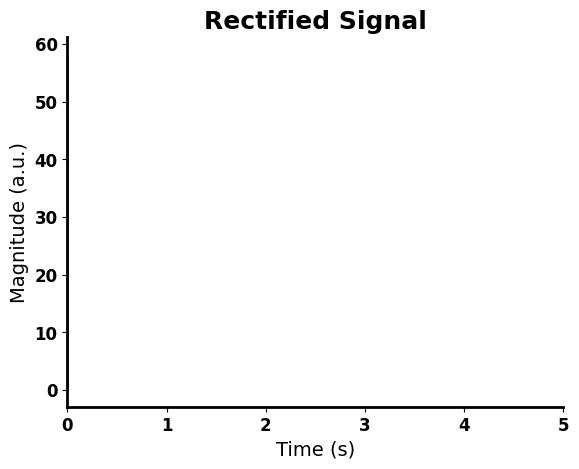

In [45]:
# P1B 2

noise_signal_large_rectified = np.abs(noise_signal_large)

fig, ax = plt.subplots()
ax.plot(x1, noise_signal_large_rectified)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel('Time (s)', size = 14)
plt.setp(ax.get_xticklabels(), fontweight = 'bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.setp(ax.get_yticklabels(), fontweight = 'bold')
ax.set_ylabel( 'Magnitude (a.u.)', size = 14)
ax.set_title('Rectified Signal', fontweight= 'bold', size = 18)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
plt.savefig('Rectified_svg')

In [46]:
# P1B 3
stat_mean = np.mean(noise_signal_large)
stat_std = np.std(noise_signal_large)
stat_var = np.var(noise_signal_large)
stat_rms = np.sqrt(np.mean(noise_signal_large**2))

rectified_df = pd.DataFrame(noise_signal_large_rectified)
mov_mean = rectified_df.rolling(window=500).mean()
mov_std = rectified_df.rolling(window=500).std()
mov_var = rectified_df.rolling(window=500).var()

def moving_rms(data, window_sz):
    return data.pow(2).rolling(window=window_sz).mean().apply(np.sqrt)

mov_rms = moving_rms(rectified_df, 500)




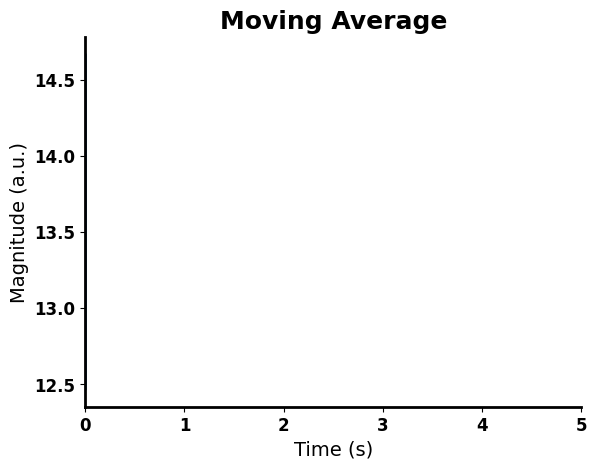

In [47]:
# P1B 3 Figures

fig, ax = plt.subplots()
ax.plot(x1, mov_mean, label = 'Moving Average')
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel('Time (s)', size = 14)
plt.setp(ax.get_xticklabels(), fontweight = 'bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.setp(ax.get_yticklabels(), fontweight = 'bold')
ax.set_ylabel( 'Magnitude (a.u.)', size = 14)
ax.set_title('Moving Average', fontweight= 'bold', size = 18)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
#ax.plot(x, mov_std, label = 'Moving StD')
#ax.plot(x, mov_var, label = 'Moving Var' )
#ax.plot(x, mov_rms, label = 'Moving RMS')
plt.savefig('Moving_Average_svg')

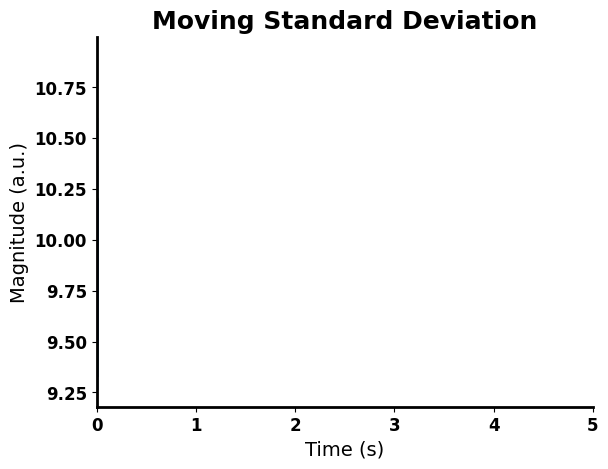

In [48]:
# P1B 3 Figures

fig, ax = plt.subplots()
ax.plot(x1, mov_std)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel('Time (s)', size = 14)
plt.setp(ax.get_xticklabels(), fontweight = 'bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.setp(ax.get_yticklabels(), fontweight = 'bold')
ax.set_ylabel( 'Magnitude (a.u.)', size = 14)
ax.set_title('Moving Standard Deviation', fontweight= 'bold', size = 18)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
plt.savefig('Moving_std_svg')

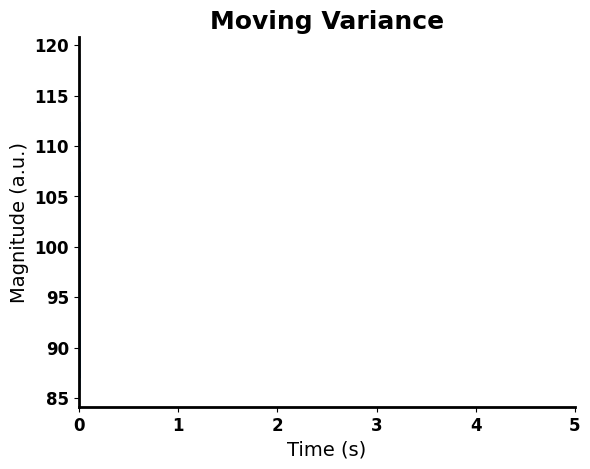

In [49]:
# P1B 3 Figures

fig, ax = plt.subplots()
ax.plot(x1, mov_var)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel('Time (s)', size = 14)
plt.setp(ax.get_xticklabels(), fontweight = 'bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.setp(ax.get_yticklabels(), fontweight = 'bold')
ax.set_ylabel( 'Magnitude (a.u.)', size = 14)
ax.set_title('Moving Variance', fontweight= 'bold', size = 18)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
plt.savefig('Moving_var_svg')

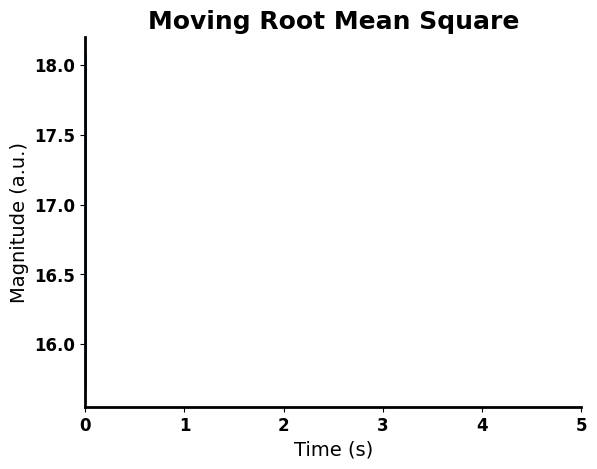

In [50]:
# P1B 3 Figures

fig, ax = plt.subplots()
ax.plot(x1, mov_rms)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel('Time (s)', size = 14)
plt.setp(ax.get_xticklabels(), fontweight = 'bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.setp(ax.get_yticklabels(), fontweight = 'bold')
ax.set_ylabel( 'Magnitude (a.u.)', size = 14)
ax.set_title('Moving Root Mean Square', fontweight= 'bold', size = 18)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
plt.savefig('Moving_rms_svg')

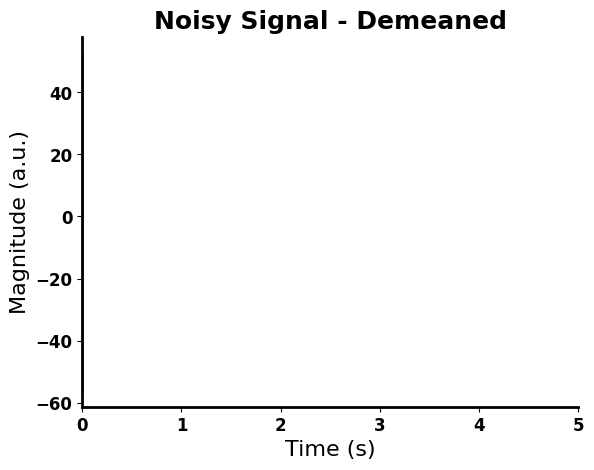

In [139]:
# DEMEANED PLOT

noise_signal_demeaned = noise_signal_large - python_mean

fig, ax = plt.subplots()
ax.plot(x1, noise_signal_demeaned)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel('Time (s)', size = 16)
plt.setp(ax.get_xticklabels(), fontweight = 'bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.setp(ax.get_yticklabels(), fontweight = 'bold')
ax.set_ylabel( 'Magnitude (a.u.)', size = 16)
ax.set_title('Noisy Signal - Demeaned', fontweight= 'bold', size = 18)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
#ax1 = sns.scatterplot(data = zeros_matrix_df, x = 0, y = 0, color = 'r')
#plt.savefig('demeaned_svg')
plt.show()


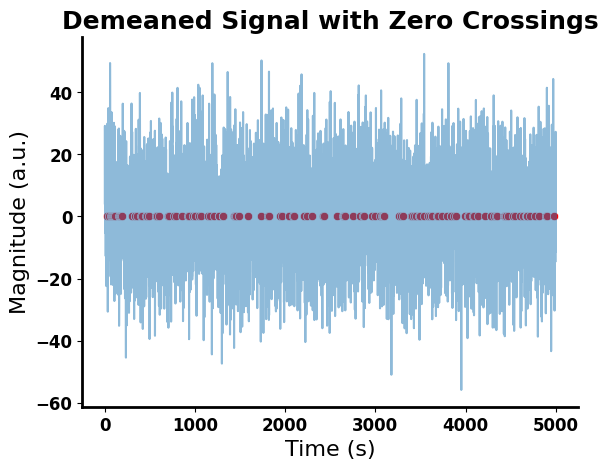

In [141]:
# # P1B 4

#zeros_matrix = np.zeros(len(noise_signal_demeaned))
zeros_matrix = []


for i, val in enumerate(noise_signal_demeaned):
    if val-1 >= 0 and val < 0:
        zeros_matrix.append(0)
    elif val-1 < 0 and val >= 0:
        zeros_matrix.append(0)
    elif val-1 >=0 and val>= 0:
        zeros_matrix.append(1)
    elif val-1 < 0 and val < 0:
        zeros_matrix.append(1)

zeros_matrix_zeroed = []
for idx, val in enumerate(zeros_matrix):
    if val == 0:
        zeros_matrix_zeroed.append(idx)


column_vals = np.zeros(len(zeros_matrix_zeroed))
zeros_matrix_data = {'Row Index': zeros_matrix_zeroed, 'Value' : column_vals}
zeros_matrix_df = pd.DataFrame(zeros_matrix_data)
zeros_matrix_df 

x1 = np.linspace(0,5000,5000)  
fig, ax = plt.subplots()
ax.plot(x1, noise_signal_demeaned, alpha = 0.5)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel('Time (s)', size = 16)
plt.setp(ax.get_xticklabels(), fontweight = 'bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.setp(ax.get_yticklabels(), fontweight = 'bold')
ax.set_ylabel( 'Magnitude (a.u.)', size = 16)
ax.set_title('Demeaned Signal with Zero Crossings', fontweight= 'bold', size = 18)
ax2 = sns.scatterplot(data = zeros_matrix_df, x = 'Row Index', y = 'Value', color = 'r')
#ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
#ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
plt.savefig('zero_crossings_svg')

In [143]:
zeros_matrix_df

,Row Index,Value
0,26,0.0
1,48,0.0
2,65,0.0
3,76,0.0
4,87,0.0
...,...,...
126,4765,0.0
127,4814,0.0
128,4896,0.0
129,4900,0.0


In [ ]:
per_zc = 5/(131/2)
freq_zc = 1/per_zc

13.1

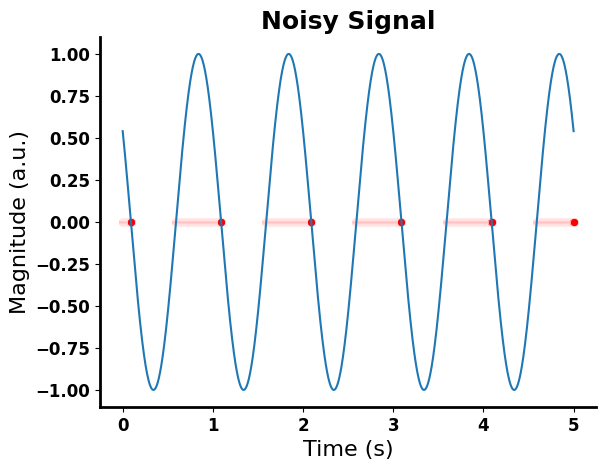

In [72]:
# P1B 5

per_zc = 5/(139/2)
freq_zc = 1/per_zc
test_mean = np.mean(y)
test_demeaned = y - test_mean 

test_matrix = []


for i, val in enumerate(test_demeaned):
    if val-1 >= 0 and val < 0:
        test_matrix.append(0)
    elif val-1 < 0 and val >= 0:
        test_matrix.append(0)
    elif val-1 >=0 and val>= 0:
        test_matrix.append(1)
    elif val-1 < 0 and val < 0:
        test_matrix.append(1)

test_matrix_zeroed = []
for idx, val in enumerate(test_matrix):
    if val == 0:
        test_matrix_zeroed.append(idx)


column_vals_test = np.zeros(len(test_matrix_zeroed))
test_matrix_data = {'Row Index': test_matrix_zeroed, 'Value' : column_vals_test}
test_matrix_df = pd.DataFrame(test_matrix_data)
#test_matrix_df 

fig, ax = plt.subplots()
ax.plot(x1, test_demeaned)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel('Time (s)', size = 16)
plt.setp(ax.get_xticklabels(), fontweight = 'bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.setp(ax.get_yticklabels(), fontweight = 'bold')
ax.set_ylabel( 'Magnitude (a.u.)', size = 16)
ax.set_title('Noisy Signal', fontweight= 'bold', size = 18)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
ax2 = sns.scatterplot(data = test_matrix_df, x = 'Row Index', y = 'Value', color = 'r')
plt.show()
#plt.savefig('Noisy_Signal_og_svg')


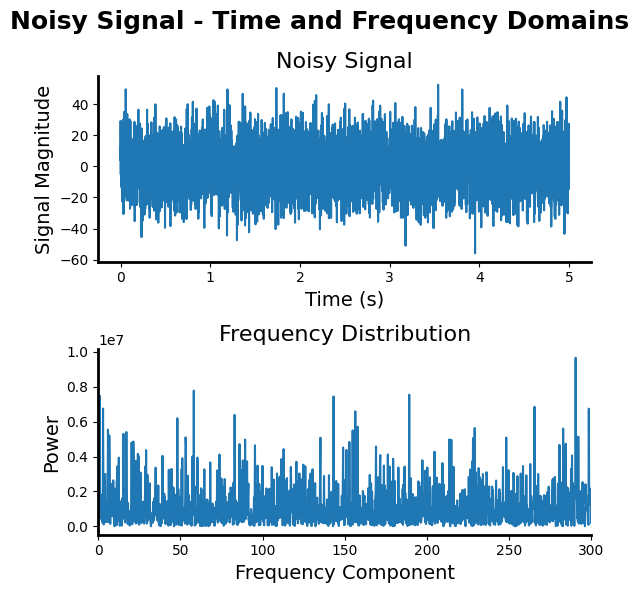

In [149]:
# fft_output = np.fft.fft(noise_signal_large)
# magnitude = np.abs(fft_output)
# frequencies = np.fft.fftfreq(len(noise_signal_large), 1/1000)
# positive_frequencies_indices = frequencies


fig, ax = plt.subplots(2,1,figsize=(6,6))
plt.suptitle('Noisy Signal - Time and Frequency Domains', fontweight = 'bold', size = 18)
ax[0].plot(x1, noise_signal_demeaned)
ax[0].set_xlabel('Time (s)', size = 14)
ax[0].set_ylabel('Signal Magnitude', size = 14)
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].spines['bottom'].set_linewidth(2)
ax[0].spines['left'].set_linewidth(2)
ax[0].set_title('Noisy Signal', size = 16)
ax[0].set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax[0].set_xticklabels(['0', '1', '2', '3', '4', '5'])

fft_output = sp.fft.rfft(noise_signal_demeaned)
magnitude = np.abs(fft_output) 
frequencies = sp.fft.rfftfreq(len(noise_signal_demeaned), d = 1/1000)
magnitude_max = np.max(magnitude)
magnitude_max_idx = np.argmax(magnitude)
#print(frequencies[magnitude_max_idx])


ax[1].plot(frequencies, magnitude**2)
ax[1].set_xlim([0, 300])
ax[1].set_xlabel('Frequency Component', size = 14)
ax[1].set_ylabel('Power', size = 14)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].spines['bottom'].set_linewidth(2)
ax[1].spines['left'].set_linewidth(2)
ax[1].set_title('Frequency Distribution', size = 16)

plt.tight_layout()
plt.savefig('fft_a2_fixes_svg')


In [56]:
# std_below_idx = []
# std_below_vals = []
# std_above_idx = []
# std_above_vals = []


# for val in (noise_signal_large):
#     if val > 7.698328074240171:
#         std_above_idx.append(0)
#         std_above_vals.append(val)
#         std_below_idx.append(1)
#         std_below_vals.append(val)
#     elif val <=7.698328074240171 and val >= -23.077244984163322:
#         std_above_idx.append(1)
#         std_above_vals.append(val)
#         std_below_idx.append(1)
#         std_below_vals.append(val)
#     elif val < -23.077244984163322:
#         std_below_idx.append(0)
#         std_below_vals.append(val)
#         std_above_idx.append(1)
#         std_above_vals.append(val)
   

# std_below_idx_zeroed = []
# std_below_vals_zeroed = []
# std_above_idx_zeroed = []
# std_above_vals_zeroed = []

# for idx, val in enumerate(std_below_idx):
#     if val == 0:
#         std_below_idx_zeroed.append(idx)
#         std_below_vals_zeroed.append(val)
#     elif val != 0:
#         std_below_idx_zeroed.append(idx)   
#         std_below_vals_zeroed.append('Nan')

# for idx, val in enumerate(std_above_idx):
#     if val == 0:
#         std_above_idx_zeroed.append(idx)
#         std_above_vals_zeroed.append(val)
#     elif val != 0: 
#         std_above_idx_zeroed.append(idx)
#         std_above_vals_zeroed.append('Nan')


# #column_vals_ab = std_above_vals
# std_above_data = {'Row Index': std_above_idx_zeroed, 'Value' : std_above_vals}
# std_above_df = pd.DataFrame(std_above_data)

# #column_vals_bl = std_below_vals
# std_below_data = {'Row Index': std_below_idx_zeroed, 'Value' : std_below_vals}
# std_below_df = pd.DataFrame(std_below_data)


# std_plot_list = []
# fig, ax = plt.subplots()


# for a in std_above_df['Row Index']:
#     for i in x1:
#         if a == 0:
#             std_plot_list.append(a)
    
#     ax.plot(x1, std_plot_list)

#     std_plot_list = []

# above_idx = std_above_df['Row Index']
# above_vals = np.abs(std_above_df['Value'])
# below_idx = std_below_df['Row Index']
# below_vals = std_below_df['Value']*-1

# fig, ax = plt.subplots()
# ax.plot(x1, noise_signal_large, alpha = 0.5)
# ax.spines[['top', 'right']].set_visible(False)
# ax.set_xlabel('Sample #', size = 14)
# plt.setp(ax.get_xticklabels(), fontweight = 'bold')
# ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
# plt.setp(ax.get_yticklabels(), fontweight = 'bold')
# ax.set_ylabel( 'Magnitude (a.u.)', size = 14)
# ax.set_title('Noisy Signal', fontweight= 'bold', size = 18)
# ax.plot(above_idx, above_vals, color = 'g', alpha = 0.5)
# ax.plot(below_idx, below_vals, color = 'red', alpha = 0.5)
# #ax3 = sns.lineplot(data = std_below_df, x = 'Row Index', y = 'Value', color = 'red')
# #ax.plot(x_ab, std_ab_window, alpha = 0.5, color = 'purple')
# #ax.plot(xbl, std_bl_window, alpha = 0.5, color = 'red')
# plt.show()



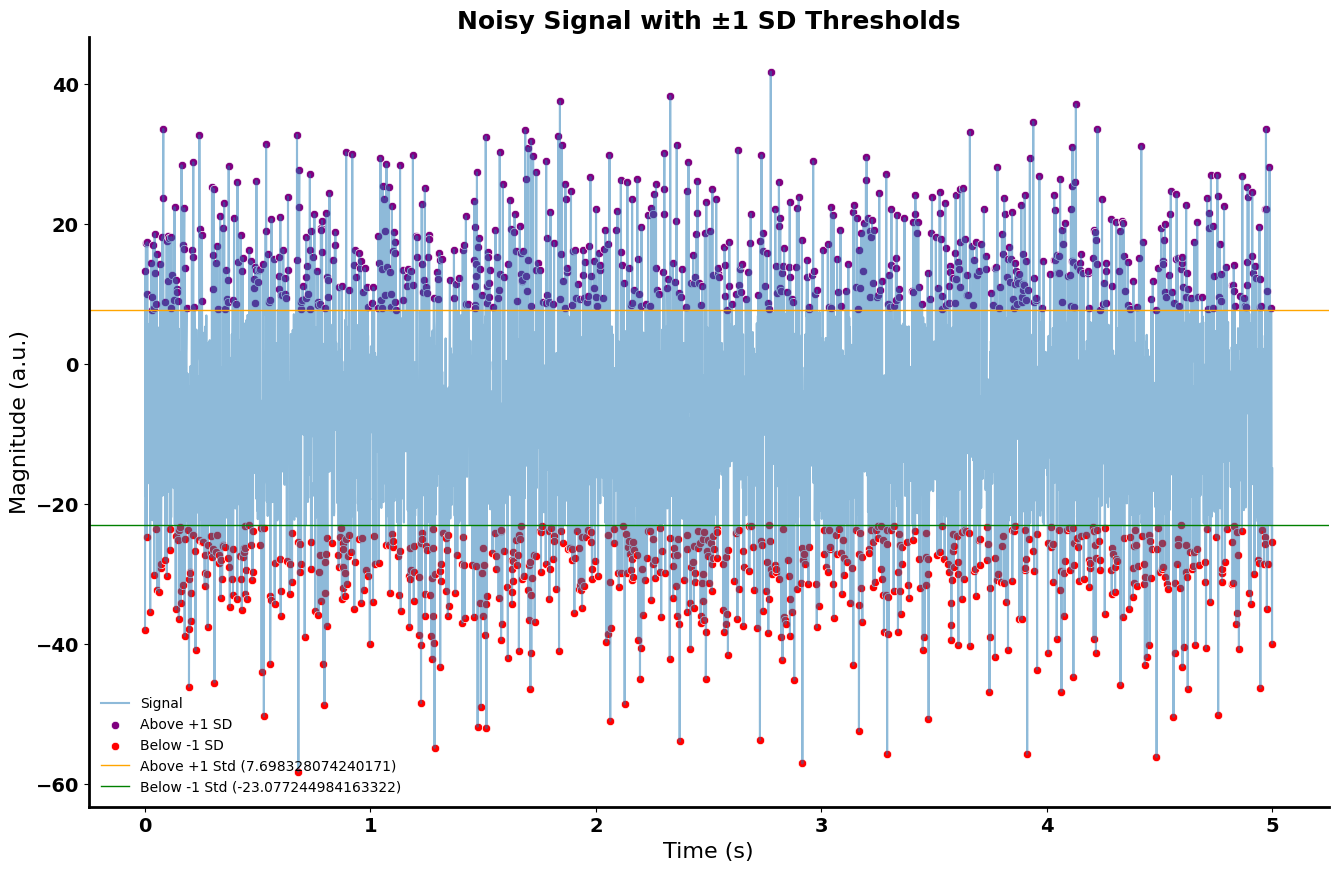

In [57]:
# P1B 5
std_prep = 15.387786529201746
mean_prep = -7.689458454961574

std_1ab = mean_prep + std_prep
std_1bl = mean_prep - std_prep

above_vals = np.full_like(noise_signal_large, np.nan, dtype=float)
below_vals = np.full_like(noise_signal_large, np.nan, dtype=float)

above_mask = noise_signal_large > std_1ab
below_mask = noise_signal_large < std_1bl

above_vals[above_mask] = noise_signal_large[above_mask]
below_vals[below_mask] = noise_signal_large[below_mask]

# Make DataFrames if you want them
std_above_df = pd.DataFrame({"Row Index": np.arange(len(noise_signal_large)),
                             "Value": above_vals})
std_below_df = pd.DataFrame({"Row Index": np.arange(len(noise_signal_large)),
                             "Value": below_vals})


fig, ax = plt.subplots(figsize=(16,10))
ax.plot(x1, noise_signal_large, alpha=0.5, label="Signal")
ax1 = sns.scatterplot(data = std_above_df, x = 'Row Index', y ='Value', color="purple", marker = 'o', label="Above +1 SD")
ax2 = sns.scatterplot(data = std_below_df, x = 'Row Index', y ='Value', color="red", marker = 'o', label="Below -1 SD")
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel("Time (s)", size=16)
ax.set_ylabel("Magnitude (a.u.)", size=16)
ax.set_title("Noisy Signal with ±1 SD Thresholds", fontweight="bold", size=18)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.setp(ax.get_yticklabels(), fontweight='bold')
ax.axhline(y = 7.698328074240171, color = 'orange', linewidth = 1, alpha = 1, label = 'Above +1 Std (7.698328074240171)')
ax.axhline(y = -23.077244984163322, color = 'green', linewidth = 1, alpha = 1, label = 'Below -1 Std (-23.077244984163322)')
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
ax.legend(frameon = False)
plt.savefig('std_thresh_svg')







# Plot
# fig, ax = plt.subplots()
# ax.plot(x1, noise_signal_large, alpha=0.5, label="Signal")
# ax.plot(x1, above_vals, color="purple", alpha=0.7, label="Above +1 SD")
# ax.plot(x1, below_vals, color="red", alpha=0.7, label="Below -1 SD")

# ax.spines[['top', 'right']].set_visible(False)
# ax.set_xlabel("Sample #", size=14)
# ax.set_ylabel("Magnitude (a.u.)", size=14)
# ax.set_title("Noisy Signal with ±1 SD Thresholds", fontweight="bold", size=16)
# ax.tick_params(axis='both', which='major', labelsize=12)
# plt.setp(ax.get_xticklabels(), fontweight='bold')
# plt.setp(ax.get_yticklabels(), fontweight='bold')
# ax.legend()
# plt.show()


In [60]:
# P1B 6

peaks, _ = find_peaks(noise_signal_large, distance = 30 )
minima, _ = find_peaks(-noise_signal_large, distance = 30)



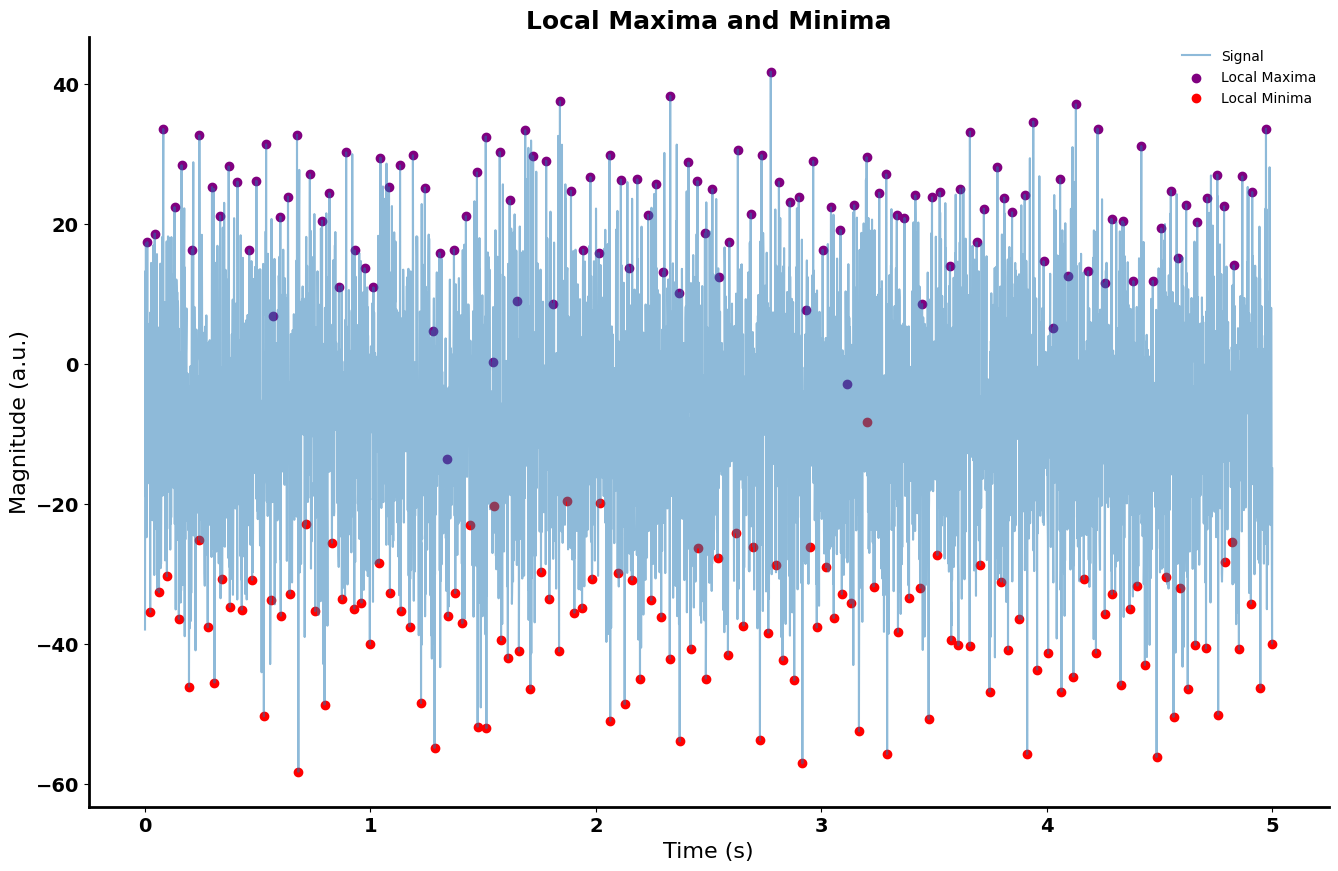

In [62]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(x1, noise_signal_large, alpha=0.5, label="Signal")
ax.scatter(x1[peaks], noise_signal_large[peaks], color="purple", marker = 'o', label="Local Maxima")
ax.scatter(x1[minima], noise_signal_large[minima], color="red", marker = 'o', label="Local Minima")
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_xlabel("Time (s)", size=16)
ax.set_ylabel("Magnitude (a.u.)", size=16)
ax.set_title("Local Maxima and Minima", fontweight="bold", size=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
ax.legend(frameon = False)
plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.setp(ax.get_yticklabels(), fontweight='bold')
plt.savefig('localmaxmindistanced_svg')